In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import scale
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
data_df= pd.read_excel("Election_Data.xlsx")

In [3]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [4]:
data_df=data_df.drop('Unnamed: 0',axis=1)

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [5]:
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
data_df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [11]:
data_df.shape

(1525, 9)

In [12]:
print("the no of rows ",data_df.shape[0]," ", "the no of colums ",data_df.shape[1])

the no of rows  1525   the no of colums  9


In [13]:
data_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [14]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
        print(feature.upper() ," ",data_df[feature].nunique())
        print(data_df[feature].value_counts().sort_values())
            

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [15]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [16]:
# skewness values quantitatively:
data_df.skew().sort_values(ascending=False)

Hague                      0.152100
age                        0.144621
Europe                    -0.135947
economic.cond.household   -0.149552
economic.cond.national    -0.240453
political.knowledge       -0.426838
Blair                     -0.535419
dtype: float64

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

### age:

In [17]:
print('Range of values: ', data_df['age'].max()-data_df['age'].min())

Range of values:  69


In [18]:
# Central values:

print('Minimum Age: ', data_df['age'].min())
print('Maximum Age: ', data_df['age'].max())
print('Mean value: ', data_df['age'].mean())
print('Median value: ',data_df['age'].median())
print('Standard deviation: ', data_df['age'].std())
print('Null values: ', data_df['age'].isnull().any())

Minimum Age:  24
Maximum Age:  93
Mean value:  54.18229508196721
Median value:  53.0
Standard deviation:  15.711208571641977
Null values:  False


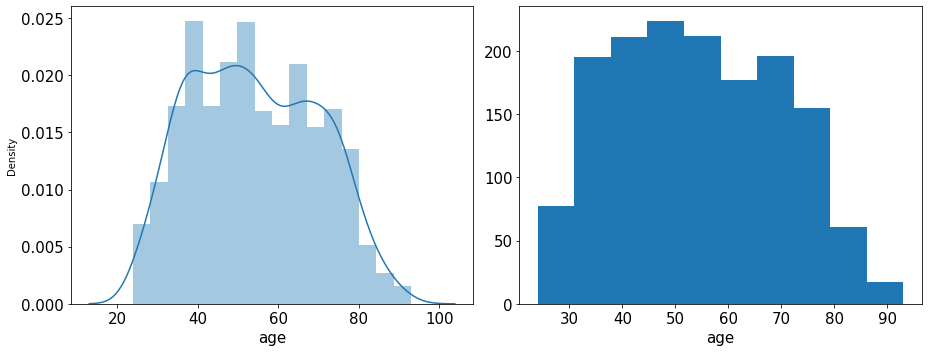

In [19]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### economic.cond.national:

In [20]:
print('Range of values: ', data_df['economic.cond.national'].max()-data_df['economic.cond.national'].min())

Range of values:  4


In [21]:
# Central values:

print('Minimum Age: ', data_df['economic.cond.national'].min())
print('Maximum Age: ', data_df['economic.cond.national'].max())
print('Mean value: ', data_df['economic.cond.national'].mean())
print('Median value: ',data_df['economic.cond.national'].median())
print('Standard deviation: ', data_df['economic.cond.national'].std())
print('Null values: ', data_df['economic.cond.national'].isnull().any())

Minimum Age:  1
Maximum Age:  5
Mean value:  3.2459016393442623
Median value:  3.0
Standard deviation:  0.8809692844149642
Null values:  False


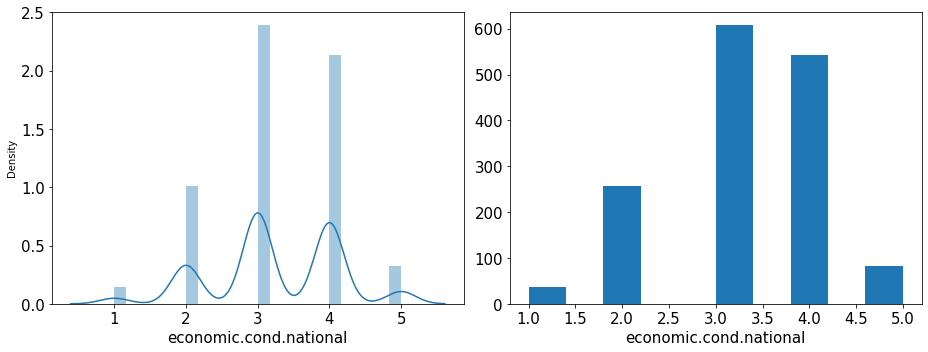

In [22]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['economic.cond.national'])
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### economic.cond.household:

In [23]:
print('Range of values: ', data_df['economic.cond.household'].max()-data_df['economic.cond.household'].min())

Range of values:  4


In [24]:
# Central values:

print('Minimum Age: ', data_df['economic.cond.household'].min())
print('Maximum Age: ', data_df['economic.cond.household'].max())
print('Mean value: ', data_df['economic.cond.household'].mean())
print('Median value: ',data_df['economic.cond.household'].median())
print('Standard deviation: ', data_df['economic.cond.household'].std())
print('Null values: ', data_df['economic.cond.household'].isnull().any())

Minimum Age:  1
Maximum Age:  5
Mean value:  3.140327868852459
Median value:  3.0
Standard deviation:  0.9299513985782148
Null values:  False


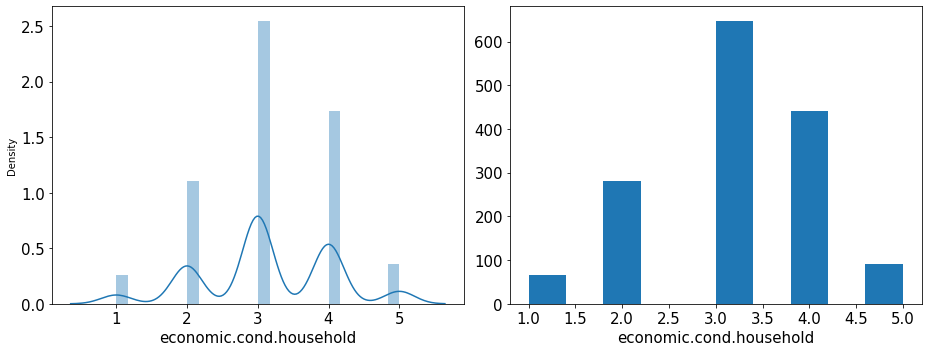

In [25]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['economic.cond.household'])
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Blair:

In [26]:
print('Range of values: ', data_df['Blair'].max()-data_df['Blair'].min())

Range of values:  4


In [27]:
# Central values:

print('Minimum Age: ', data_df['Blair'].min())
print('Maximum Age: ', data_df['Blair'].max())
print('Mean value: ', data_df['Blair'].mean())
print('Median value: ',data_df['Blair'].median())
print('Standard deviation: ', data_df['Blair'].std())
print('Null values: ', data_df['Blair'].isnull().any())

Minimum Age:  1
Maximum Age:  5
Mean value:  3.3344262295081966
Median value:  4.0
Standard deviation:  1.1748241123034677
Null values:  False


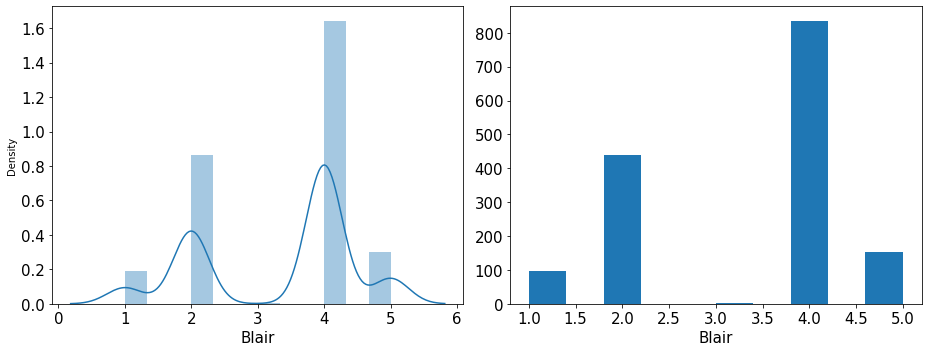

In [28]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Blair'],ax=ax2)
ax2.set_xlabel('Blair', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Hague:

In [29]:
print('Range of values: ', data_df['Hague'].max()-data_df['Hague'].min())

Range of values:  4


In [30]:
# Central values:

print('Minimum Age: ', data_df['Hague'].min())
print('Maximum Age: ', data_df['Hague'].max())
print('Mean value: ', data_df['Hague'].mean())
print('Median value: ',data_df['Hague'].median())
print('Standard deviation: ', data_df['Hague'].std())
print('Null values: ', data_df['Hague'].isnull().any())

Minimum Age:  1
Maximum Age:  5
Mean value:  2.7468852459016393
Median value:  2.0
Standard deviation:  1.2307034736168108
Null values:  False


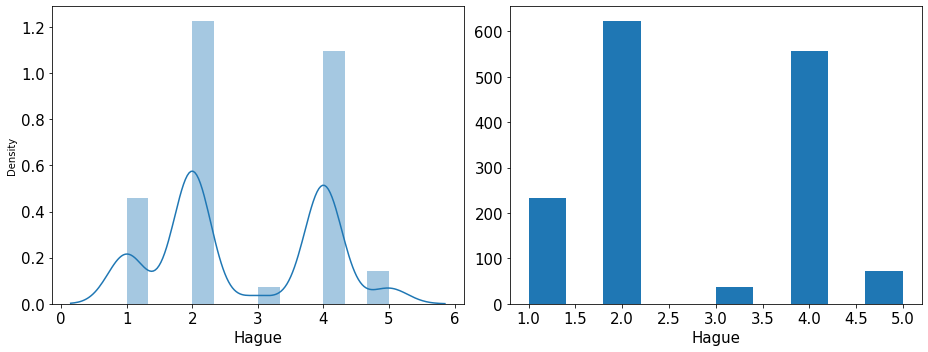

In [31]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Hague'],ax=ax2)
ax2.set_xlabel('Hague', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Europe:

In [32]:
print('Range of values: ', data_df['Europe'].max()-data_df['Europe'].min())

Range of values:  10


In [33]:
# Central values:

print('Minimum Age: ', data_df['Europe'].min())
print('Maximum Age: ', data_df['Europe'].max())
print('Mean value: ', data_df['Europe'].mean())
print('Median value: ',data_df['Europe'].median())
print('Standard deviation: ', data_df['Europe'].std())
print('Null values: ', data_df['Europe'].isnull().any())

Minimum Age:  1
Maximum Age:  11
Mean value:  6.728524590163935
Median value:  6.0
Standard deviation:  3.297538370463229
Null values:  False


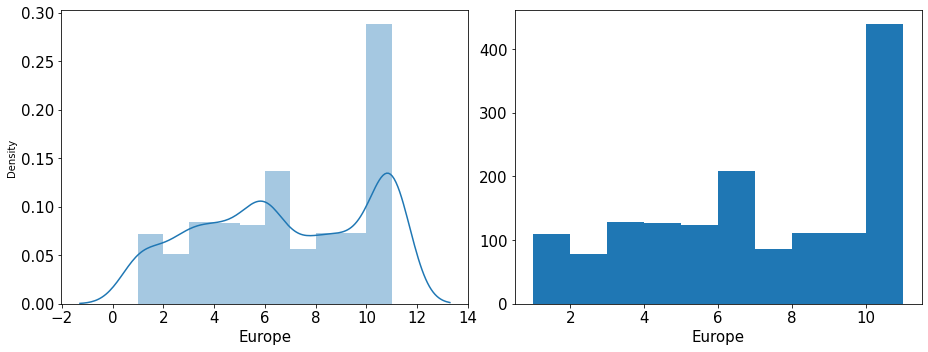

In [34]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Europe'],ax=ax2)
ax2.set_xlabel('Europe', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### political.knowledge:

In [35]:
print('Range of values: ', data_df['political.knowledge'].max()-data_df['political.knowledge'].min())

Range of values:  3


In [36]:
# Central values:

print('Minimum Age: ', data_df['political.knowledge'].min())
print('Maximum Age: ', data_df['political.knowledge'].max())
print('Mean value: ', data_df['political.knowledge'].mean())
print('Median value: ',data_df['political.knowledge'].median())
print('Standard deviation: ', data_df['political.knowledge'].std())
print('Null values: ', data_df['political.knowledge'].isnull().any())

Minimum Age:  0
Maximum Age:  3
Mean value:  1.5422950819672132
Median value:  2.0
Standard deviation:  1.0833147486432724
Null values:  False


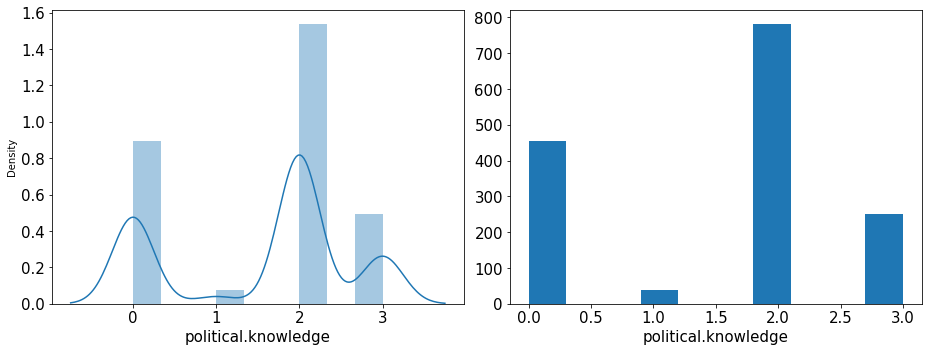

In [37]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['political.knowledge'],ax=ax2)
ax2.set_xlabel('political.knowledge', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['political.knowledge'])
ax3.set_xlabel('political.knowledge', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### vote:

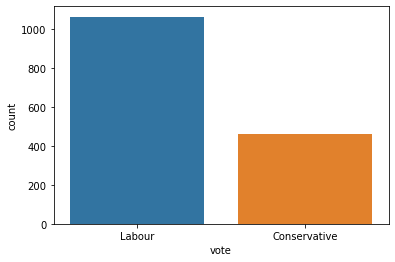

In [38]:
sns.countplot(data = data_df, x = 'vote')                                                  ## count plot
plt.show()

### gender:

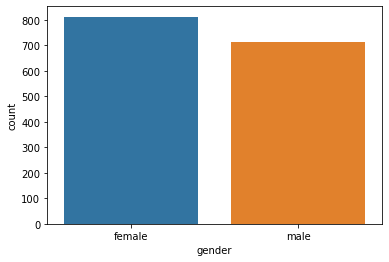

In [39]:
sns.countplot(data = data_df, x = 'gender')                                                  ## count plot
plt.show()

## EDA:

### EDA-Step-1: Checking for duplicate records in the data:

In [40]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


### EDA-Step 2: Checking Missing value:

In [41]:
# Are there any missing values ?
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### EDA-Step 3 : Outlier Checks:

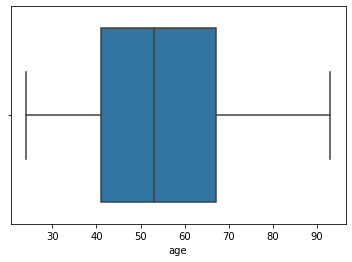

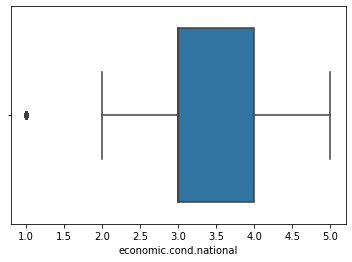

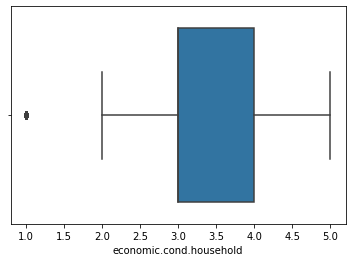

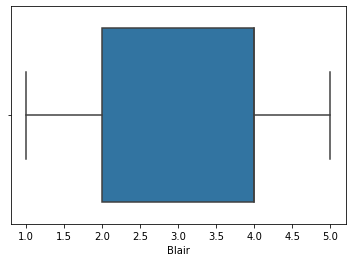

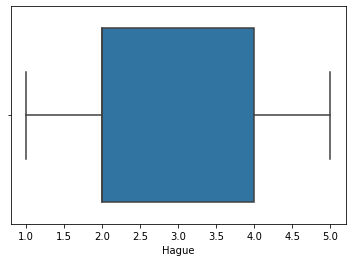

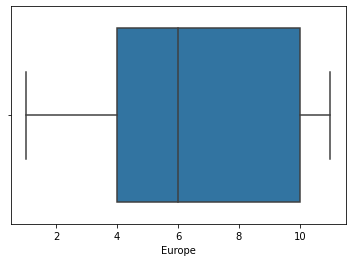

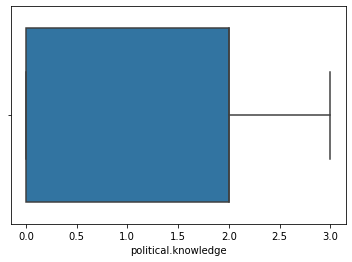

In [42]:
cols = ['age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe','political.knowledge' ]
for i in cols:
    sns.boxplot(data_df[i],whis=1.5)
    plt.show();

In [43]:
We will not treat the outlier over here.

SyntaxError: invalid syntax (<ipython-input-43-6b31403f3d33>, line 1)

### EDA-Step 4 : Univariate Analysis:

Text(0.5, 1.0, 'Blair boxplot')

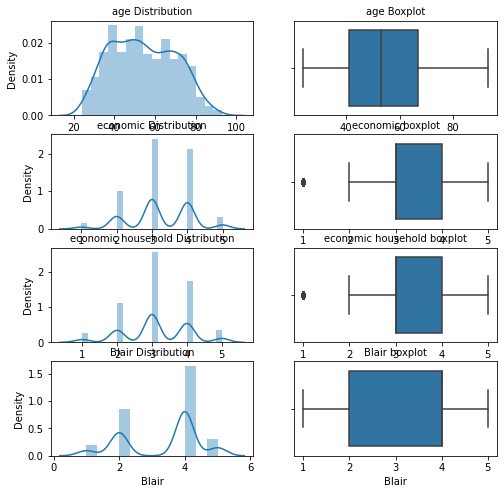

In [46]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(data_df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(data_df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(data_df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(data_df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

Text(0.5, 1.0, 'political knowledge boxplot')

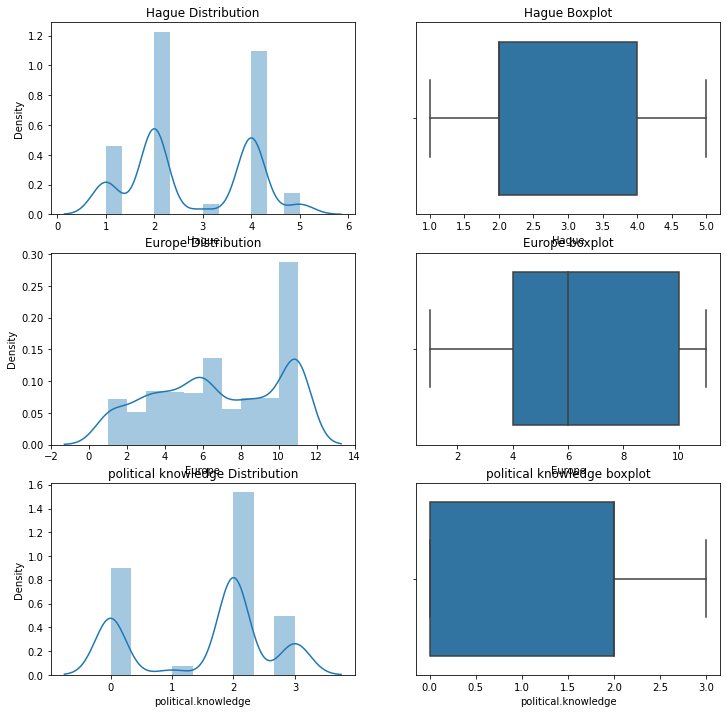

In [44]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,12)
a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=12)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=12)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=12)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=12)

a=sns.distplot(data_df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=12)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=12)

### EDA-Step 5 : Bivariate and Multivariate Analysis:

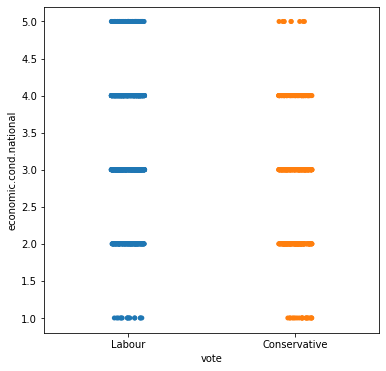

In [45]:
plt.figure(figsize=(6,6))
sns.stripplot(data_df["vote"], data_df['economic.cond.national'], jitter=True) 
plt.show()

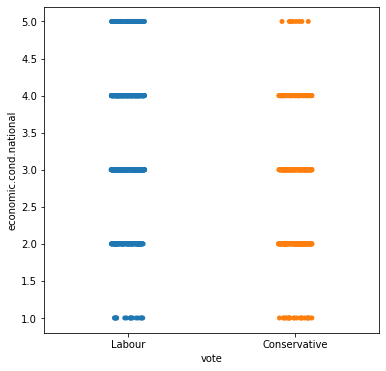

In [46]:
plt.figure(figsize=(6,6))
sns.stripplot(data_df["vote"], data_df['economic.cond.national'], jitter=True) 
plt.show()

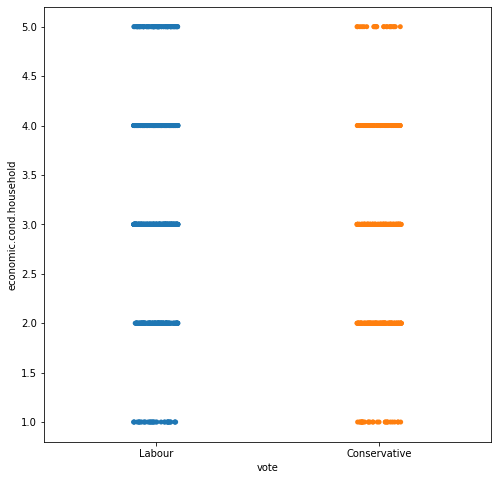

In [47]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['economic.cond.household'], jitter=True) 
plt.show()

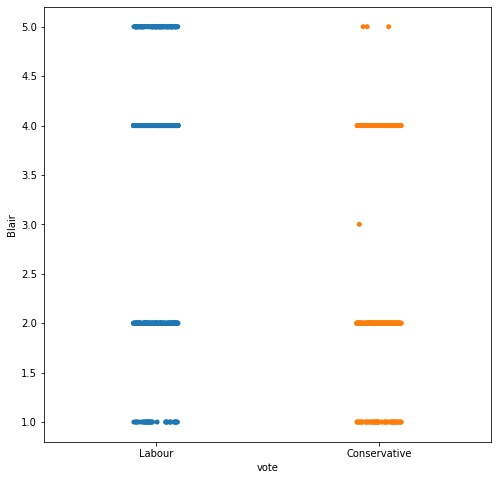

In [48]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Blair'], jitter=True) 
plt.show()

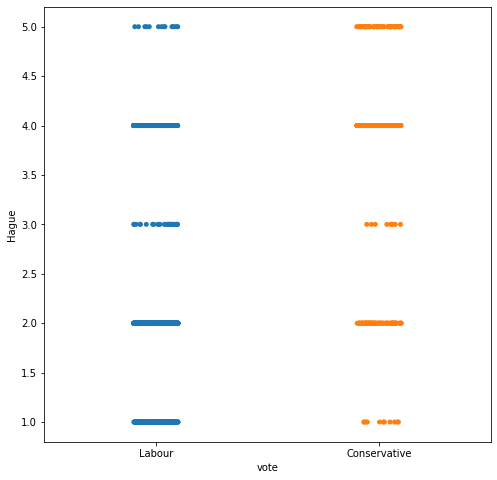

In [49]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Hague'], jitter=True) 
plt.show()

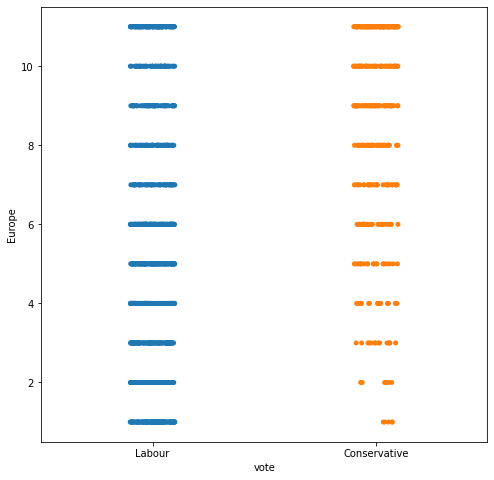

In [50]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Europe'], jitter=True) 
plt.show()

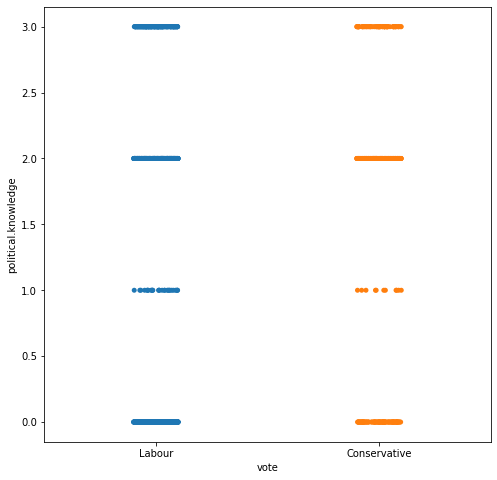

In [51]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['political.knowledge'], jitter=True) 
plt.show()

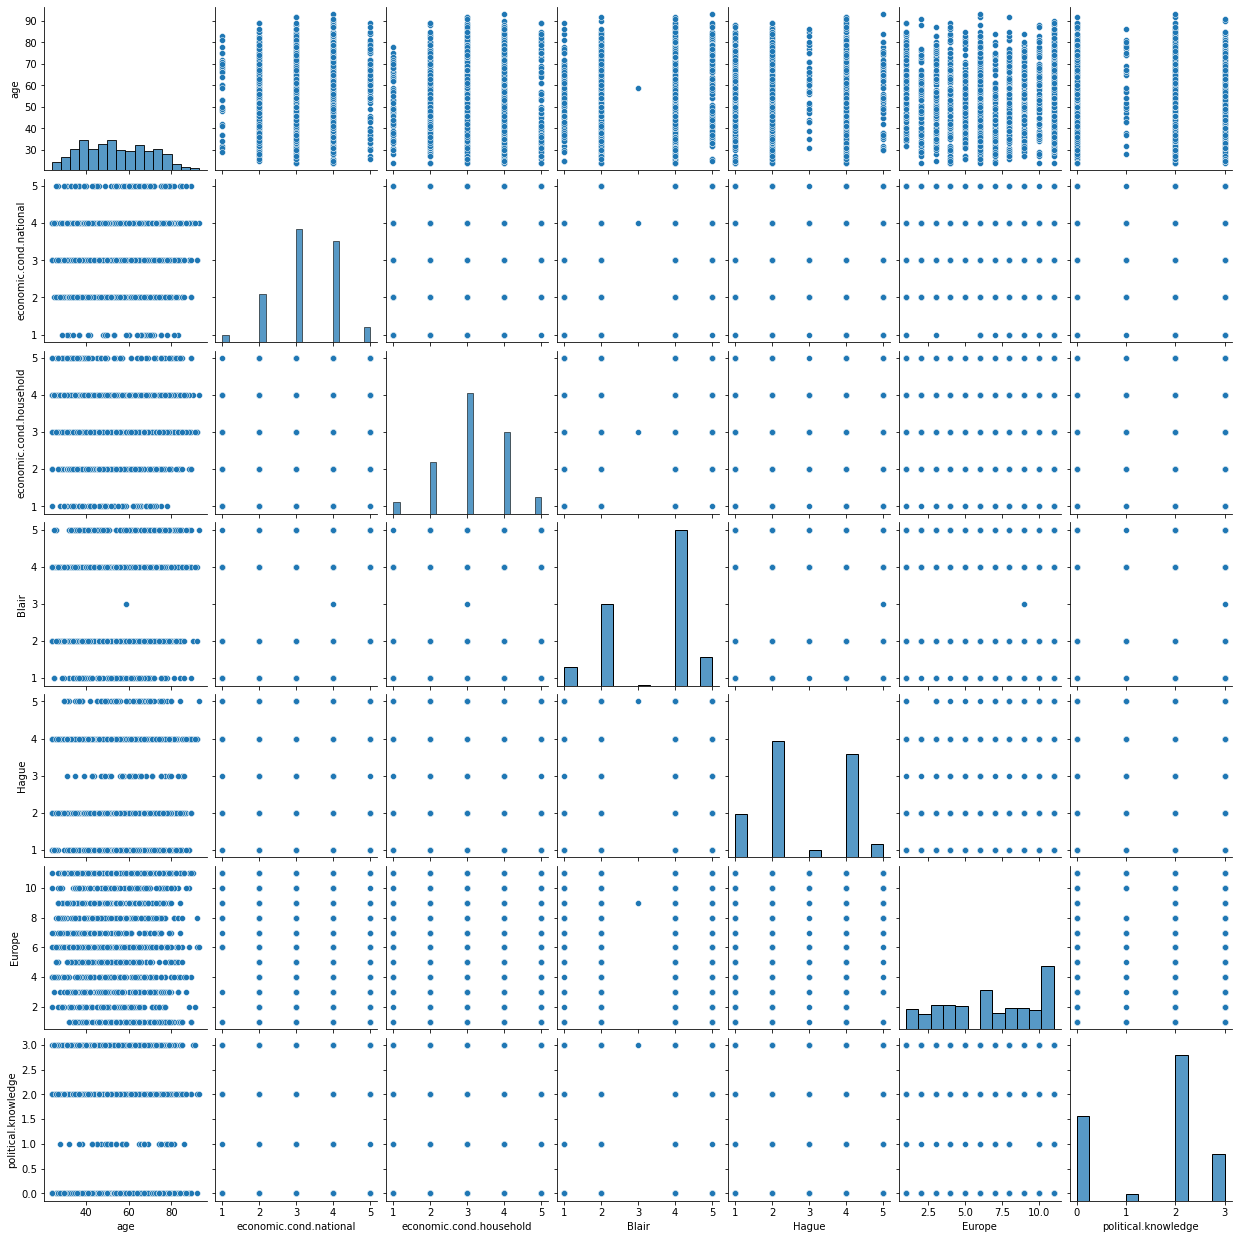

In [52]:
sns.pairplot(data_df)

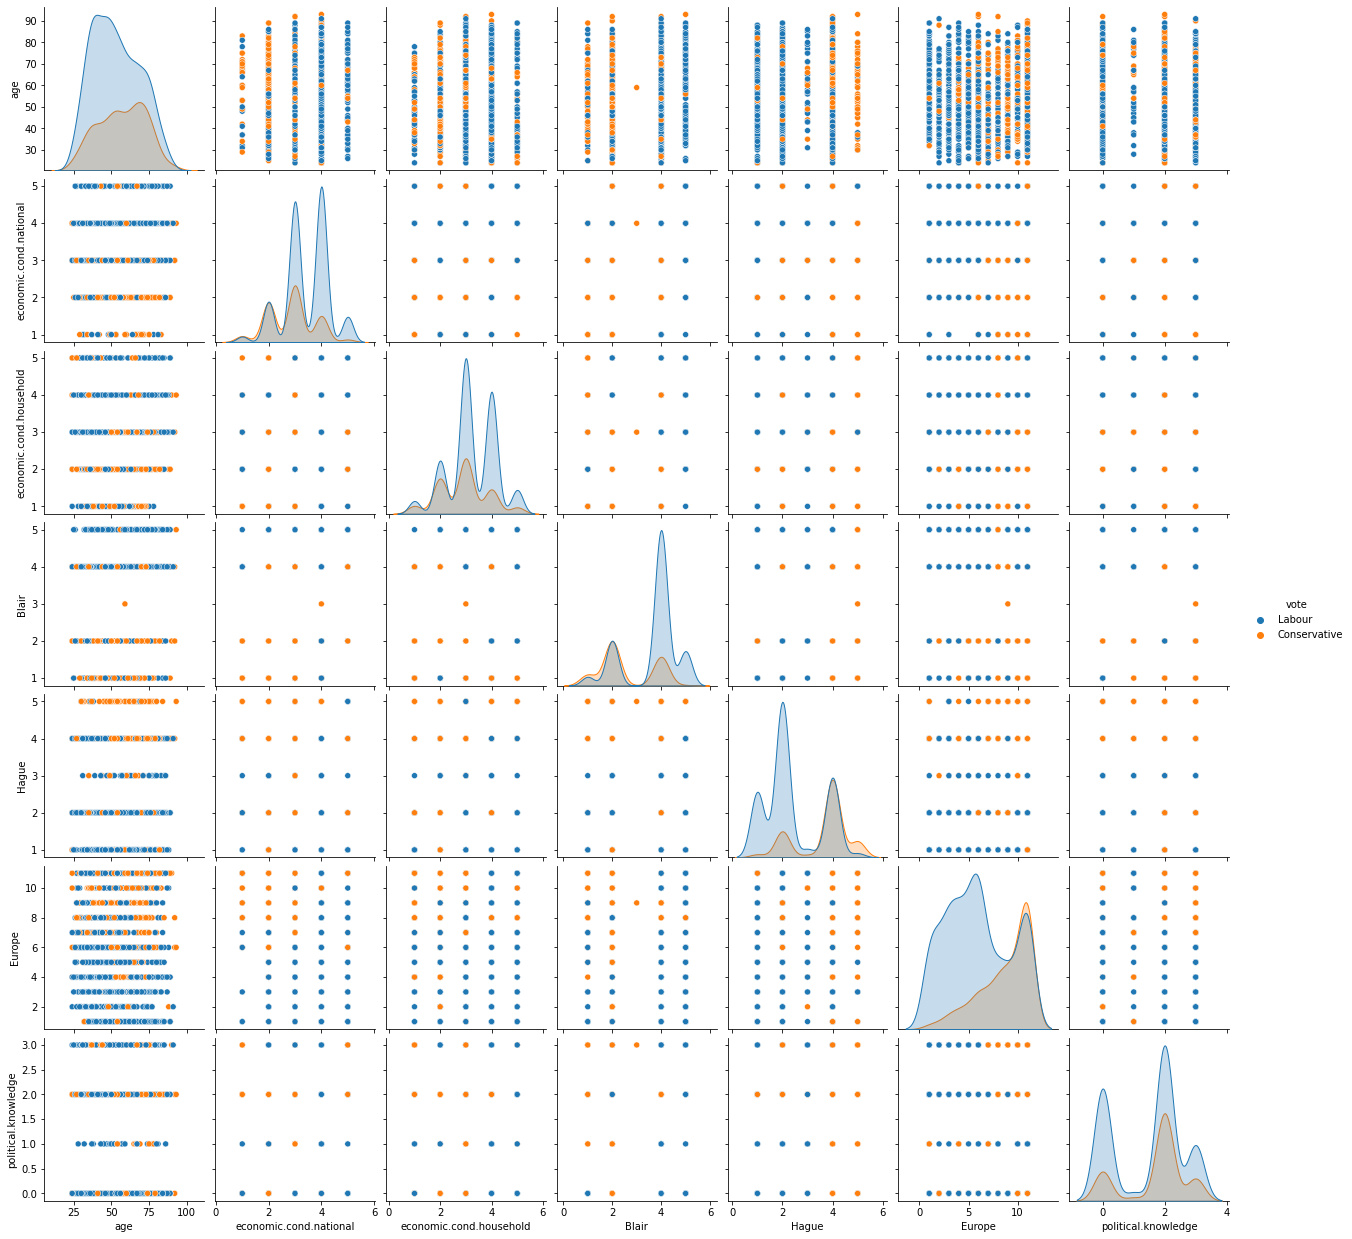

In [53]:
sns.pairplot(data_df, hue='vote')

<AxesSubplot:>

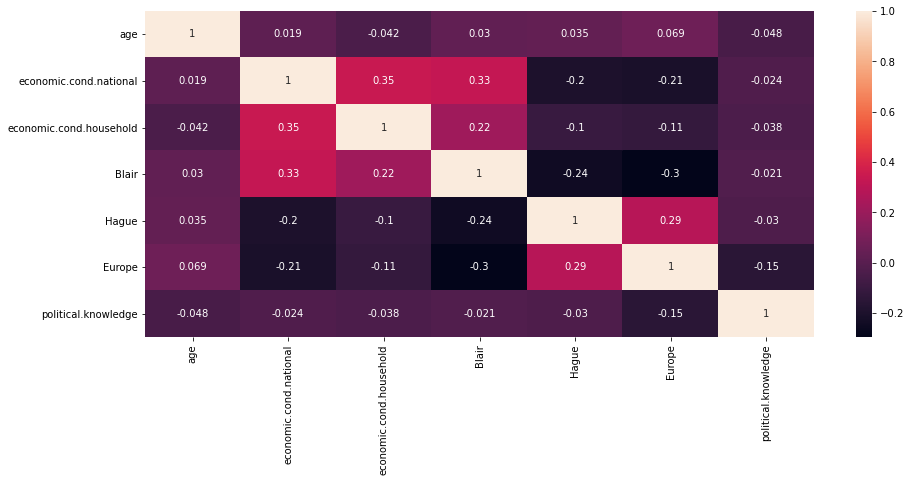

In [54]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(),annot=True)

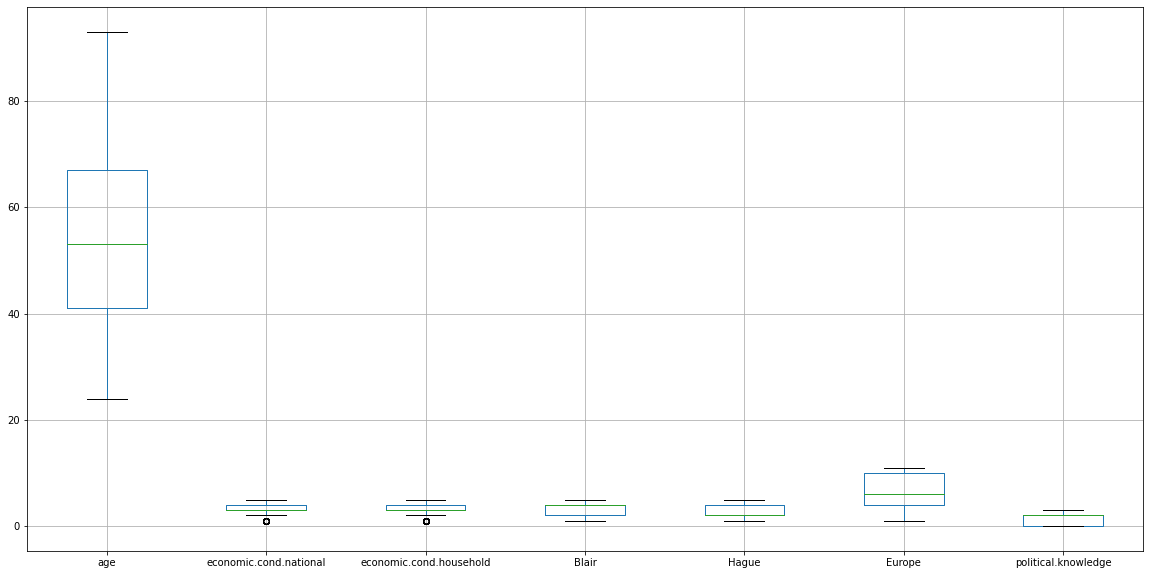

In [55]:
plt.figure(figsize=(20,10))
data_df.boxplot()
plt.show()

### Blair Vs Age:

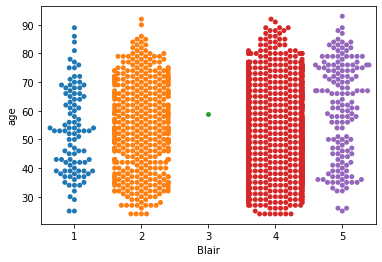

In [56]:
sns.swarmplot(data = data_df, x='Blair', y='age')                                    ## Swarmpot
plt.show()

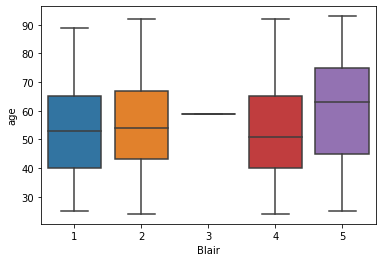

In [57]:
sns.boxplot(data = data_df, x='Blair', y='age')                                    ## BoxPlot
plt.show()

### Hague Vs age:

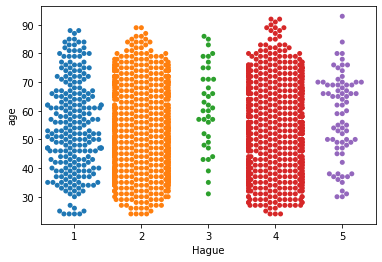

In [58]:
sns.swarmplot(data = data_df, x='Hague', y='age')                                    ## Swarmpot
plt.show()

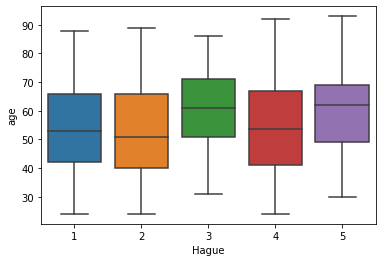

In [59]:
sns.boxplot(data = data_df, x='Hague', y='age')                                    ## BoxPlot
plt.show()

### Catplot Analysis- Blair (Count) on economic.cond.household:

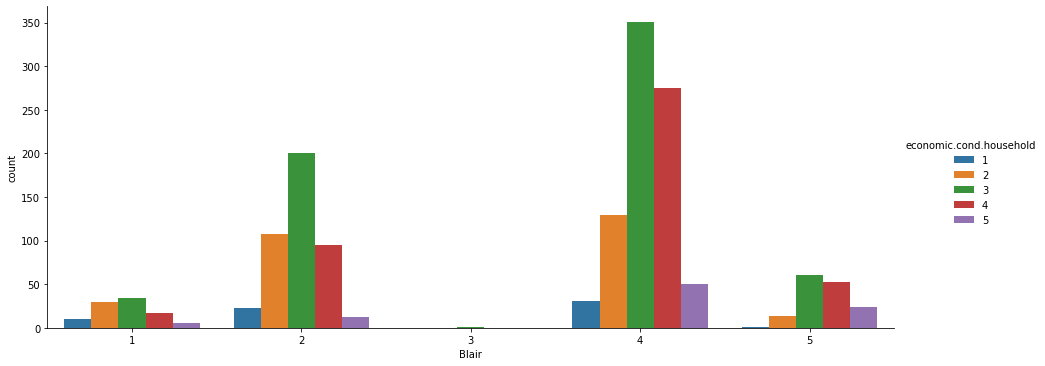

In [60]:
sns.catplot('Blair', data= data_df, kind='count',aspect=2.5, hue= 'economic.cond.household')
plt.show()

### Catplot Analysis- Hague (Count) on economic.cond.household:

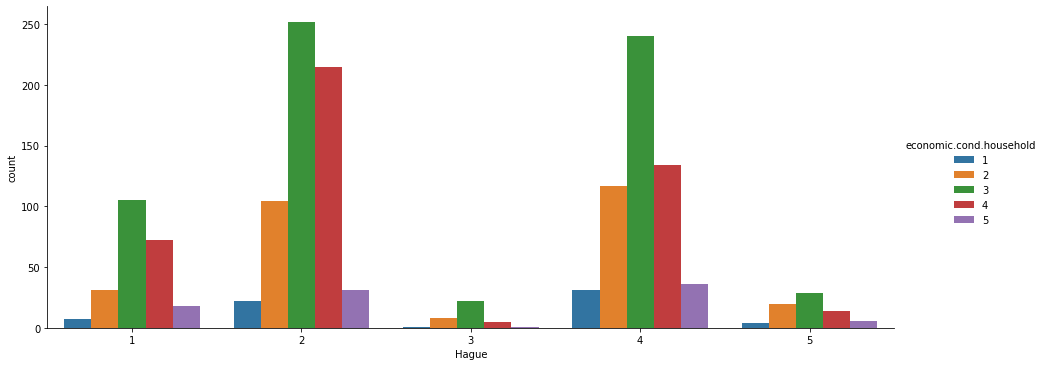

In [62]:
sns.catplot('Hague', data= data_df, kind='count',aspect=2.5, hue= 'economic.cond.household')
plt.show()

### Catplot Analysis- Blair (Count) on economic.cond.national:

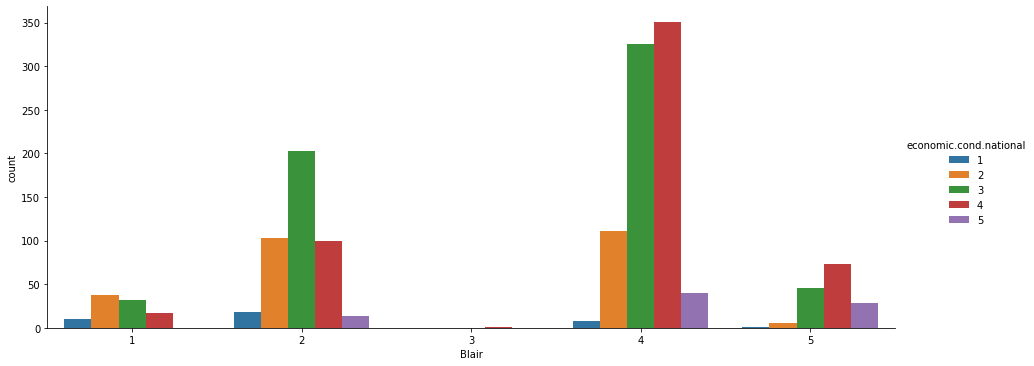

In [63]:
sns.catplot('Blair', data= data_df, kind='count',aspect=2.5, hue= 'economic.cond.national')
plt.show()

### Catplot Analysis- Hague (Count) on economic.cond.national:

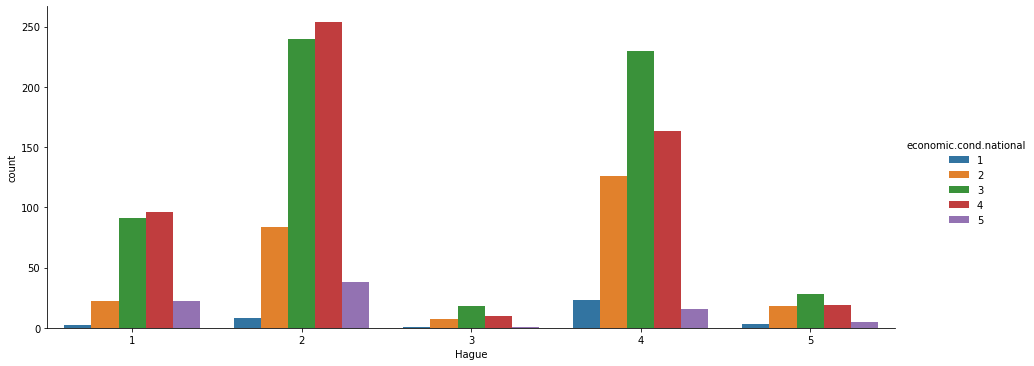

In [64]:
sns.catplot('Hague', data= data_df, kind='count',aspect=2.5, hue= 'economic.cond.national')
plt.show()

### Catplot Analysis- Blair (Count) on Europe:

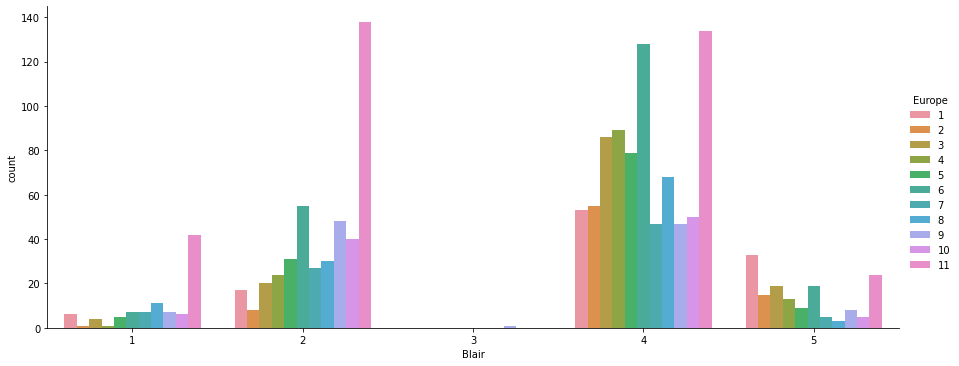

In [65]:
sns.catplot('Blair', data= data_df, kind='count',aspect=2.5, hue= 'Europe')
plt.show()

### Catplot Analysis- Hague (Count) on Europe:

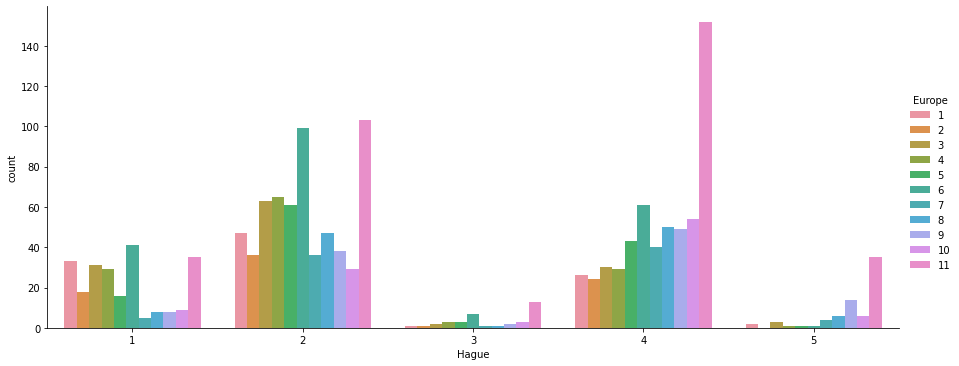

In [66]:
sns.catplot('Hague', data= data_df, kind='count',aspect=2.5, hue= 'Europe')
plt.show()

### Catplot Analysis- Blair (Count) on political.knowledge:

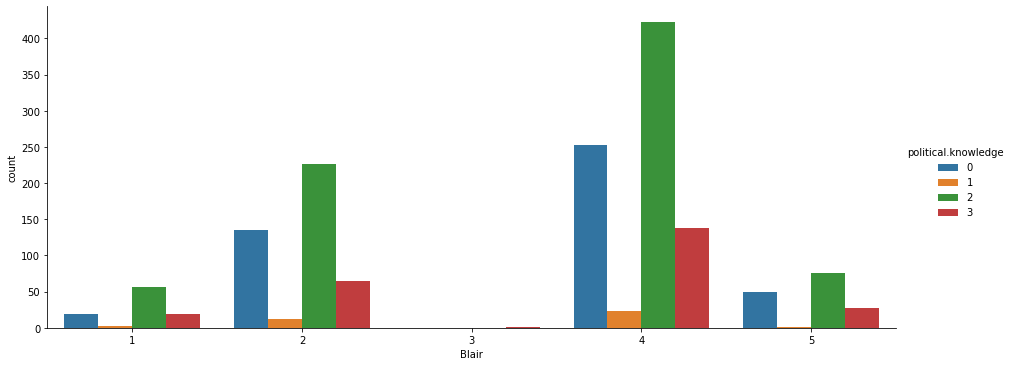

In [67]:
sns.catplot('Blair', data= data_df, kind='count',aspect=2.5, hue= 'political.knowledge')
plt.show()

### Catplot Analysis- Hague (Count) on political.knowledge:

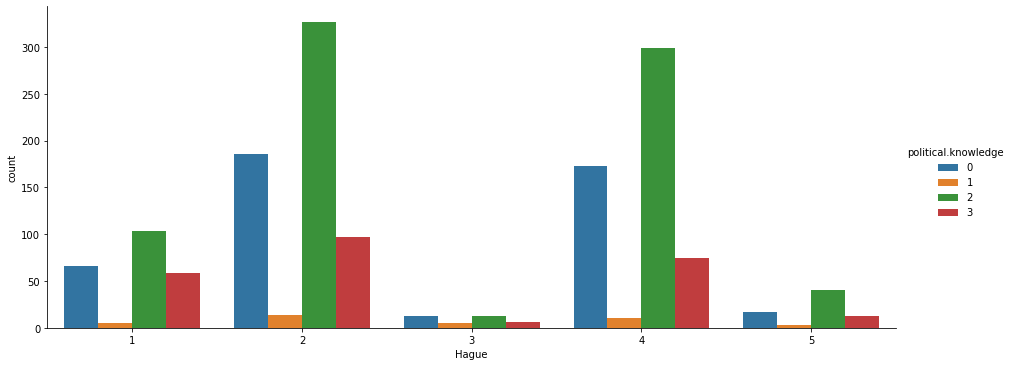

In [68]:
sns.catplot('Hague', data= data_df, kind='count',aspect=2.5, hue= 'political.knowledge')
plt.show()

In [69]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 

In [75]:
# Geting unique counts of all Objects.

print('cut\n',data_df.vote.value_counts())
print('\n')
print('color\n',data_df.gender.value_counts())
print('\n')

cut
 Labour          1063
Conservative     462
Name: vote, dtype: int64


color
 female    812
male      713
Name: gender, dtype: int64




In [76]:
cat1 = ['vote', 'gender']

In [77]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [78]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   vote_Labour              1525 non-null   uint8
 8   gender_male              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [81]:
df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [82]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
1493,34,3,1,4,2,6,2,1,0
1171,37,4,3,4,1,4,0,1,1
674,43,4,1,2,4,6,2,1,1
1179,74,4,4,4,2,9,0,1,0
28,44,3,3,4,2,1,2,1,1
1462,76,5,3,4,1,11,0,1,0
521,51,4,3,4,1,2,2,1,1
1040,59,3,3,2,4,4,3,0,0
1032,35,2,3,2,3,10,2,0,1
1208,45,4,4,4,2,6,0,1,0


In [95]:
x=df.drop('IsLabour_or_not',axis=1)
y=df['IsLabour_or_not']

In [96]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [97]:
from scipy.stats import zscore

In [98]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [99]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [126]:
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1143, 8)
Number of rows and columns of the training set for the dependent variable: (1143,)
Number of rows and columns of the test set for the independent variables: (382, 8)
Number of rows and columns of the test set for the dependent variable: (382,)


In [127]:
y_train.value_counts(1)

1    0.692913
0    0.307087
Name: IsLabour_or_not, dtype: float64

In [128]:
y_test.value_counts(1)

1    0.709424
0    0.290576
Name: IsLabour_or_not, dtype: float64

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### Discriminant Analysis:

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=1)

In [110]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [111]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8372703412073491
[[246 105]
 [ 81 711]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       351
           1       0.87      0.90      0.88       792

    accuracy                           0.84      1143
   macro avg       0.81      0.80      0.80      1143
weighted avg       0.83      0.84      0.84      1143



### AUC ROC curve for LDA Train:

the auc 0.888 


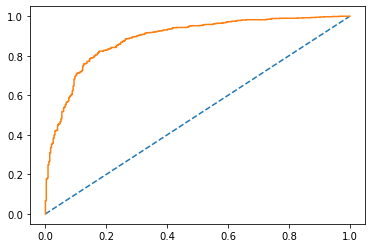

In [112]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [113]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.824607329842932
[[ 76  35]
 [ 32 239]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       111
           1       0.87      0.88      0.88       271

    accuracy                           0.82       382
   macro avg       0.79      0.78      0.79       382
weighted avg       0.82      0.82      0.82       382



### AUC ROC curve for LDA Test:

the auc curve 0.888 


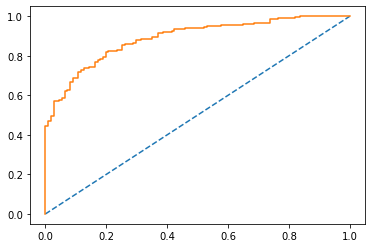

In [114]:

probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Confusion Matrix for the training data:

In [138]:
confusion_matrix(Y_train, y_train_predict)

array([[242, 109],
       [ 73, 719]], dtype=int64)

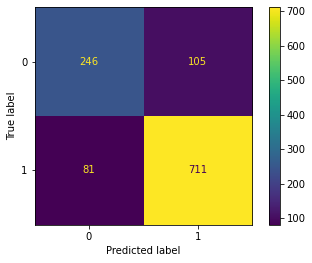

In [139]:
plot_confusion_matrix(LDA_model, X_train, Y_train);

### Confusion Matrix for test data:

In [140]:
confusion_matrix(Y_test, y_test_predict)

array([[ 74,  37],
       [ 31, 240]], dtype=int64)

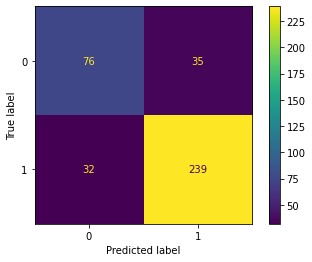

In [141]:
plot_confusion_matrix(LDA_model,X_test, Y_test);

### Logistic Regression:

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
#Logistic_model=LogisticRegression()
#Logistic_model.fit(X_train,Y_train)

In [117]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [118]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8407699037620298
[[242 109]
 [ 73 719]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       351
           1       0.87      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.80      0.81      1143
weighted avg       0.84      0.84      0.84      1143



In [119]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.737788,0.262212
1,0.022668,0.977332
2,0.957092,0.042908
3,0.026836,0.973164
4,0.049037,0.950963


In [120]:
Logistic_model.score(X_train,Y_train)

0.8407699037620298

### AUC ROC curve for Logistic Regression Train:

AUC: 0.889


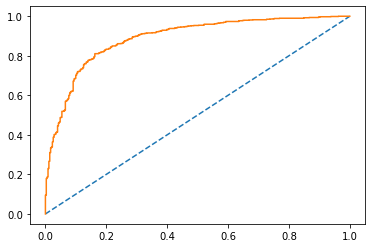

In [121]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [122]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8219895287958116
[[ 74  37]
 [ 31 240]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       111
           1       0.87      0.89      0.88       271

    accuracy                           0.82       382
   macro avg       0.79      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382



In [123]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.927149,0.072851
1,0.699505,0.300495
2,0.326127,0.673873
3,0.487992,0.512008
4,0.171596,0.828404


### AUC ROC curve for Logistic Regression Test:

AUC: 0.887


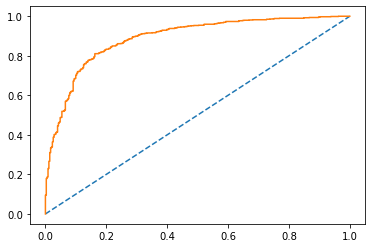

In [124]:

probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

### Confusion Matrix for the training data:

In [132]:
confusion_matrix(Y_train, y_train_predict)

array([[242, 109],
       [ 73, 719]], dtype=int64)

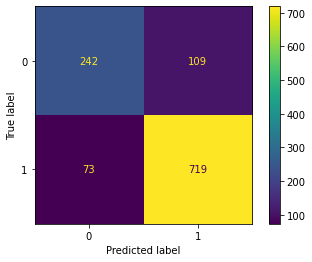

In [134]:
plot_confusion_matrix(Logistic_model, X_train, Y_train);

### Confusion Matrix for test data:

In [135]:
confusion_matrix(Y_test, y_test_predict)

array([[ 74,  37],
       [ 31, 240]], dtype=int64)

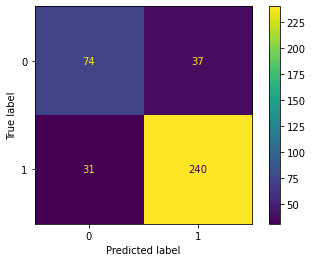

In [137]:
plot_confusion_matrix(Logistic_model,X_test, Y_test);

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

## Naive Bayes:

In [142]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [143]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [145]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [146]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


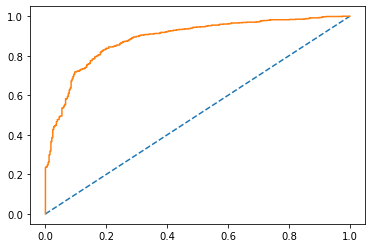

In [147]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [148]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


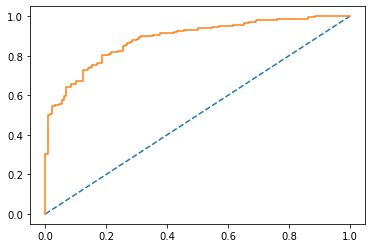

In [149]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


### Confusion Matrix for the testing data:

Confusion Matrix


<AxesSubplot:>

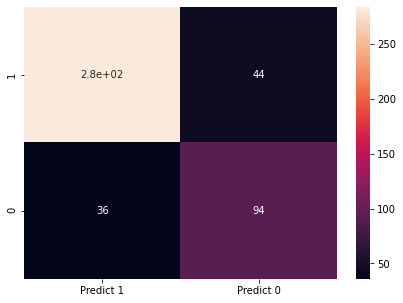

In [179]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, Y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Confusion Matrix for the training data:

Confusion Matrix


<AxesSubplot:>

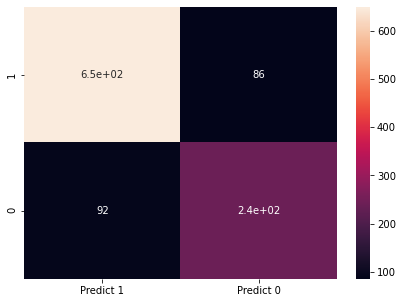

In [180]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_train, Y_train_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## KNN:

In [155]:
x=df.drop('IsLabour_or_not',axis=1)
y=df['IsLabour_or_not']

In [156]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [157]:
from scipy.stats import zscore

In [158]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [159]:
x.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169
7,1.452797,-0.279218,0.924730,0.566716,-1.419886,-1.737782,-1.424148,1.067169
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059
9,1.007109,-0.279218,-1.226625,1.418187,-1.419886,1.295778,0.422643,1.067169


In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [161]:

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [162]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [163]:
print(KNN_model_score)

0.8678915135608049


In [164]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



## AUC ROC Curve KNN Train:

the auc 0.932 


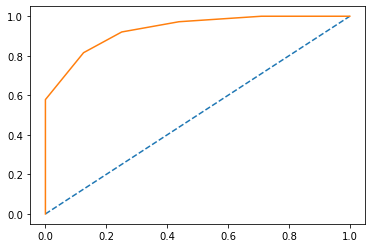

In [165]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [166]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.824607329842932


In [167]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



## AUC ROC Curve KNN Test:

the auc curve 0.870 


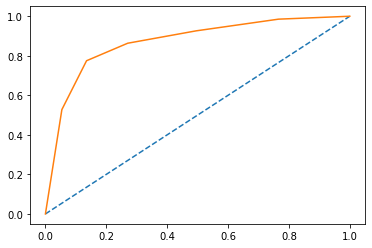

In [168]:

probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [169]:

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [170]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8530183727034121
[[253  98]
 [ 70 722]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.90       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



In [171]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8350785340314136
[[ 84  27]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       111
           1       0.90      0.87      0.88       271

    accuracy                           0.84       382
   macro avg       0.80      0.81      0.80       382
weighted avg       0.84      0.84      0.84       382



In [172]:

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [173]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8678915135608049
[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [174]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.824607329842932
[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



In [175]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.23298429319371727,
 0.19633507853403143,
 0.17539267015706805,
 0.16492146596858637,
 0.17801047120418845,
 0.17277486910994766,
 0.17539267015706805,
 0.18586387434554974,
 0.17801047120418845,
 0.17277486910994766]

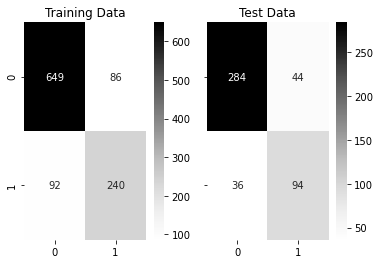

In [184]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, Y_train_predict, labels=[1, 0])),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test, Y_test_predict, labels=[1, 0])),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### AUC ROC curve after n classifier for train data set:

the auc curve 0.904 


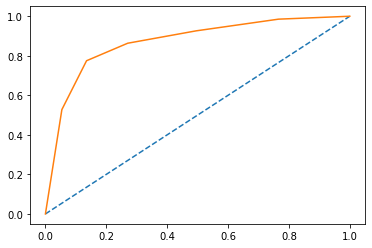

In [176]:

probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


### AUC ROC curve after n classifier for test data set:

the auc curve 0.900 


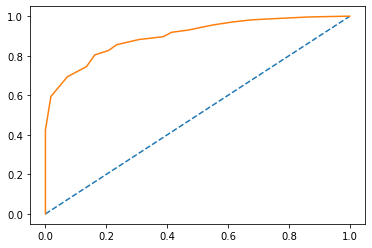

In [177]:

probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


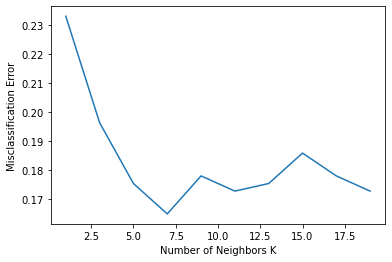

In [178]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Bagging Train:

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [186]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [187]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [188]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



### AUC _ROC  Curve Bagging Train:

AUC: 1.000


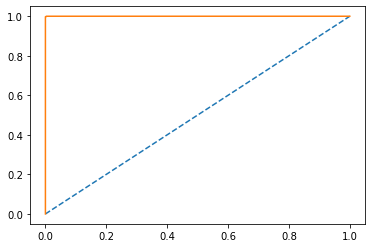

In [189]:

probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### Bagging Test:

In [190]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



### AUC _ROC  Curve Bagging Test:

AUC: 0.877


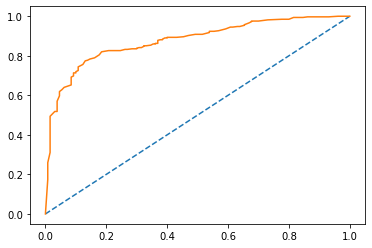

In [191]:

probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Boosting Train:

### Ada Boost:

In [192]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [194]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


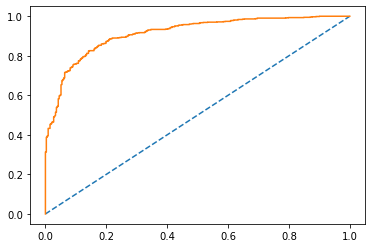

In [195]:

probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### Gradient Boosting:

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [197]:

y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



### AUC _ROC  Curve Boosting Train:

AUC: 0.950


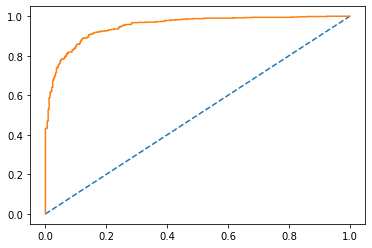

In [198]:

probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### ADA Boosting Test:

In [199]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



### AUC _ROC  Curve Boosting Test:

AUC: 0.879


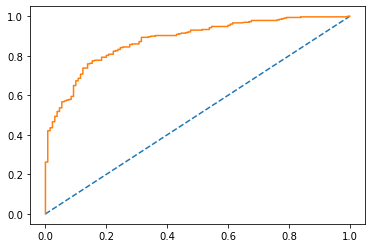

In [200]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Gradient Boosting Test:

In [201]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



### Gradient Boosting AUC_ROC Curve Test:

AUC: 0.904


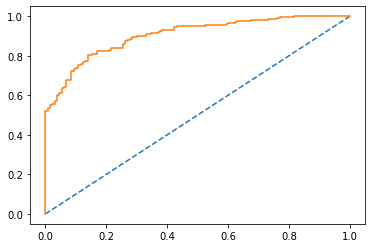

In [202]:

probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)